In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root

In [2]:
A = 202 # outgoing radiation
B = 1.9 # outgoing radiation
k = 1.6*B # transport parameter
s = lambda y: 1 - 0.482*(3*y**2 - 1)/2 # solar weighting
aw = 0.32 # water albedo
ai = 0.62 # ice albedo
Tc = -10.0 # critical temperature for ice formation
Q0 = 342.0 # solar constant (1370 W/m^2 divided by 4)

Qmin = (Tc + A/B)*(B+k)/((1 - aw)*(s(1) + k/B))
Qmax = (Tc + A/B)*(B+k)/((1 - ai)*(s(0) + k/B))
print("Min Q value for ice free", Qmin)
print("Max Q value for complete ice Earth", Qmax)

# Note version in lectures was a 1/2 factor off on the second grouping of terms; 
# now corrected to match Q6 of PS4
abar = lambda ys: ai + (aw - ai)*ys*(1 - 0.241*(ys**2 - 1))
Tbar = lambda ys, Q: (Q*(1 - abar(ys)) - A)/B 
Tbari = lambda Q: (Q*(1 - ai)- A)/B
Tbarw = lambda Q: (Q*(1 - aw)- A)/B
Qfunc = lambda ys: (Tc + A/B)*(B+k)/(s(ys)*(1 - (ai+aw)/2) + k/B*(1 - abar(ys)))

Min Q value for ice free 330.3616063989335
Max Q value for complete ice Earth 440.72694936919913


The solution converged.
lower ice line =  0.25615270185042965
The solution converged.
higher ice line =  0.9394721159996462
change of sign in gradient at ys = 0.6092609260926093
Tipping Point at Q = 325.83394511200845
Amount Q must be decreased = 16.16605488799155
Percentage Q must be decreased by = 4.726916633915658
increase required before ice retreats from equator = 114.89300425719068


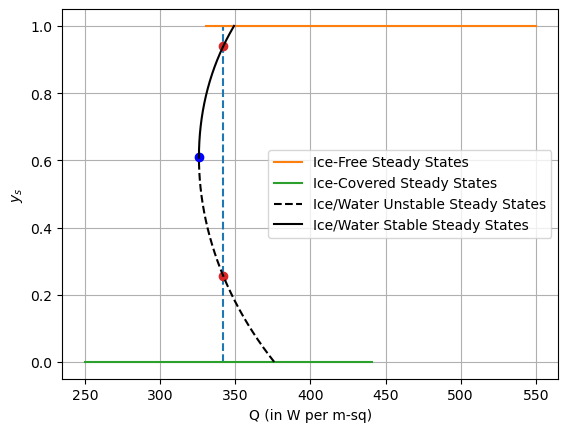

In [3]:
# Solve for the ice line
ys = np.linspace(0, 1, 10000);
Qs = Qfunc(ys);
#plt.plot(Qs, ys, 'k', label="Ice/Water Mixture Steady States")
plt.plot([Q0, Q0], [0, 1], '--')
plt.plot([Qmin, 550], [1, 1], label="Ice-Free Steady States")
plt.plot([250, Qmax], [0, 0], label="Ice-Covered Steady States")
plt.xlabel('Q (in W per m-sq)');
plt.ylabel('$\it{y_s}$');
plt.grid(1)


# We can obtain the ice-line positions via Newton's. 
# At the value of Q0 = 342, to obtain the ice line 
# solve the equation 342 = Qfunc(ys) for the ys. 
fwd = lambda ys: Q0 - Qfunc(ys)
sol = root(fwd, 0.2)
print(sol.message)
ys_low = sol.x[0]
print("lower ice line = ", ys_low)
sol = root(fwd, 0.9)
print(sol.message)
ys_high = sol.x[0]
print("higher ice line = ", ys_high)
plt.plot([Q0, Q0], [ys_low, ys_high], 'o')
# plt.savefig('ys_vs_Q.png')
#print(type(ys))
#print(type(Qs))
#print(ys)
#print(Qs)

ysn_1=0.1
grad_arr = []
grad1=-158

for i in range(len(ys)):
    ysn=float(ys[i])
    grad=(Qfunc(ysn)-Qfunc(ysn_1))/(ysn-ysn_1)
    grad_arr.append(grad)
    if grad*grad1 < 0:
        print("change of sign in gradient at ys = %s" % ysn)
        QTip = Qfunc(ysn)
        QDelta = 342-QTip
        Q_percentage = (100*QDelta)/342
        print("Tipping Point at Q = %s" % QTip)
        print("Amount Q must be decreased = %s" % QDelta)
        print("Percentage Q must be decreased by = %s" % Q_percentage)
        IncreaseReq = Qmax - QTip
        print("increase required before ice retreats from equator = %s" % IncreaseReq)
        plt.plot(QTip, ysn, 'o', color = 'blue')
        TippingY = ysn
    ysn_1=ysn    
    grad1=grad
    
ys_unstable = np.linspace(0, TippingY, 10000) #(1-TippingY)
Qs_unstable = Qfunc(ys_unstable)
plt.plot(Qs_unstable, ys_unstable, 'k', label="Ice/Water Unstable Steady States", linestyle='dashed')
ys_stable = np.linspace(TippingY, 1, 10000)
Qs_stable = Qfunc(ys_stable);
plt.plot(Qs_stable, ys_stable, 'k', label="Ice/Water Stable Steady States")
plt.legend();

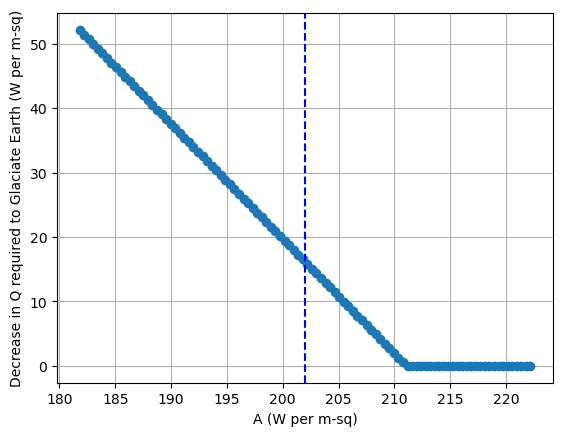

In [4]:
ASpace = np.linspace(181.8, 222.2, 100)
Q_decrease_arr = []
Q_increase_arr = []

for i in range(len(ASpace)):
    A = ASpace[i]
    B = 1.9 # outgoing radiation
    k = 1.6*B # transport parameter
    s = lambda y: 1 - 0.482*(3*y**2 - 1)/2 # solar weighting
    aw = 0.32 # water albedo
    ai = 0.62 # ice albedo
    Tc = -10.0 # critical temperature for ice formation
    Q0 = 342.0 # solar constant (1370 W/m^2 divided by 4)

    Qmin = (Tc + A/B)*(B+k)/((1 - aw)*(s(1) + k/B))
    Qmax = (Tc + A/B)*(B+k)/((1 - ai)*(s(0) + k/B))
    #print("Min Q value for ice free", Qmin)
    #print("Max Q value for complete ice Earth", Qmax)

    # Note version in lectures was a 1/2 factor off on the second grouping of terms; 
    # now corrected to match Q6 of PS4
    abar = lambda ys: ai + (aw - ai)*ys*(1 - 0.241*(ys**2 - 1))
    Tbar = lambda ys, Q: (Q*(1 - abar(ys)) - A)/B 
    Tbari = lambda Q: (Q*(1 - ai)- A)/B
    Tbarw = lambda Q: (Q*(1 - aw)- A)/B
    Qfunc = lambda ys: (Tc + A/B)*(B+k)/(s(ys)*(1 - (ai+aw)/2) + k/B*(1 - abar(ys)))
    
    # Solve for the ice line
    ys = np.linspace(0, 1, 10000);
    Qs = Qfunc(ys);
    #plt.plot(Qs, ys, 'k', label="Ice/Water Mixture Steady States")
    #plt.plot([Q0, Q0], [0, 1], '--')
    #plt.plot([Qmin, 550], [1, 1], label="Ice-Free Steady States")
    #plt.plot([250, Qmax], [0, 0], label="Ice-Covered Steady States")
    #plt.xlabel('Q (in W per m-sq)');
    #plt.ylabel('$\it{y_s}$');
    plt.grid(1)


    # We can obtain the ice-line positions via Newton's. 
    # At the value of Q0 = 342, to obtain the ice line 
    # solve the equation 342 = Qfunc(ys) for the ys. 
    fwd = lambda ys: Q0 - Qfunc(ys)
    sol = root(fwd, 0.2)
    #print(sol.message)
    ys_low = sol.x[0]
    #print("lower ice line = ", ys_low)
    sol = root(fwd, 0.9)
    #print(sol.message)
    ys_high = sol.x[0]
    #print("higher ice line = ", ys_high)
    #plt.plot([Q0, Q0], [ys_low, ys_high], 'o')
    # plt.savefig('ys_vs_Q.png')
    #print(type(ys))
    #print(type(Qs))
    #print(ys)
    #print(Qs)

    ysn_1=0.1
    grad_arr = []
    grad1=-158

    for i in range(len(ys)):
        ysn=float(ys[i])
        grad=(Qfunc(ysn)-Qfunc(ysn_1))/(ysn-ysn_1)
        grad_arr.append(grad)
        if grad*grad1 < 0:
            #print("change of sign in gradient at ys = %s" % ysn)
            QTip = Qfunc(ysn)
            QDelta = 342-QTip
            Q_percentage = (100*QDelta)/342
            #print("Tipping Point at Q = %s" % QTip)
            
            if QDelta < 0:
                QDelta = 0
                #print("Decrease in Q required to glaciate earth = %s" % QDelta)
            #else:    
                #print("Decrease in Q required to glaciate earth = %s" % QDelta)
            
            #print("For A = %s" % A)
            #print("Percentage Q must be decreased by = %s" % Q_percentage)
            IncreaseReq = Qmax - QTip
            #print("Increase required before ice retreats from equator = %s" % IncreaseReq)
            #print("\n")
            #plt.plot(QTip, ysn, 'o', color = 'blue')
            TippingY = ysn
            Q_decrease_arr.append(QDelta)
            Q_increase_arr.append(IncreaseReq)
        ysn_1=ysn    
        grad1=grad

    #plt.plot(325.8, TippingY, 'o')
    #print("finished for loop")    
        
    ys_unstable = np.linspace(0, TippingY, 10000) #(1-TippingY)
    Qs_unstable = Qfunc(ys_unstable)
    #plt.plot(Qs_unstable, ys_unstable, 'k', label="Ice/Water Unstable Steady States", linestyle='dashed')
    ys_stable = np.linspace(TippingY, 1, 10000)
    Qs_stable = Qfunc(ys_stable);
    #plt.plot(Qs_stable, ys_stable, 'k', label="Ice/Water Stable Steady States")
    #plt.legend();
    
plt.plot(ASpace, Q_decrease_arr, 'o')  
plt.xlabel('A (W per m-sq)')
plt.ylabel('Decrease in Q required to Glaciate Earth (W per m-sq)')
plt.axvline(x=202, color='blue', linestyle='dashed')

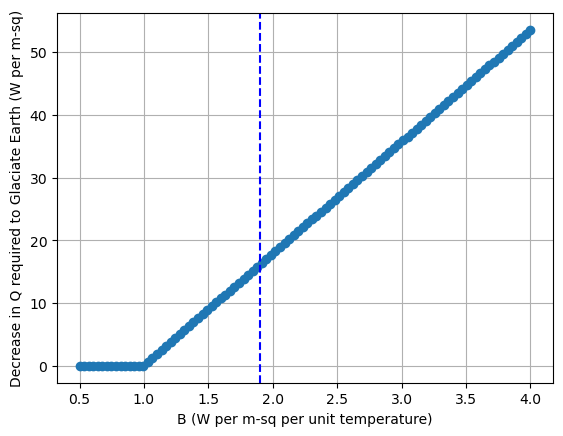

In [6]:
BSpace = np.linspace(0.5, 4, 100)
Q_decrease_arr = []
Q_increase_arr = []

for i in range(len(ASpace)):
    A = 202 #ASpace[i]
    B = BSpace[i] # outgoing radiation
    k = 1.6*B # transport parameter
    s = lambda y: 1 - 0.482*(3*y**2 - 1)/2 # solar weighting
    aw = 0.32 # water albedo
    ai = 0.62 # ice albedo
    Tc = -10.0 # critical temperature for ice formation
    Q0 = 342.0 # solar constant (1370 W/m^2 divided by 4)

    Qmin = (Tc + A/B)*(B+k)/((1 - aw)*(s(1) + k/B))
    Qmax = (Tc + A/B)*(B+k)/((1 - ai)*(s(0) + k/B))
    #print("Min Q value for ice free", Qmin)
    #print("Max Q value for complete ice Earth", Qmax)

    # Note version in lectures was a 1/2 factor off on the second grouping of terms; 
    # now corrected to match Q6 of PS4
    abar = lambda ys: ai + (aw - ai)*ys*(1 - 0.241*(ys**2 - 1))
    Tbar = lambda ys, Q: (Q*(1 - abar(ys)) - A)/B 
    Tbari = lambda Q: (Q*(1 - ai)- A)/B
    Tbarw = lambda Q: (Q*(1 - aw)- A)/B
    Qfunc = lambda ys: (Tc + A/B)*(B+k)/(s(ys)*(1 - (ai+aw)/2) + k/B*(1 - abar(ys)))
    
    # Solve for the ice line
    ys = np.linspace(0, 1, 10000);
    Qs = Qfunc(ys);
    #plt.plot(Qs, ys, 'k', label="Ice/Water Mixture Steady States")
    #plt.plot([Q0, Q0], [0, 1], '--')
    #plt.plot([Qmin, 550], [1, 1], label="Ice-Free Steady States")
    #plt.plot([250, Qmax], [0, 0], label="Ice-Covered Steady States")
    #plt.xlabel('Q (in W per m-sq)');
    #plt.ylabel('$\it{y_s}$');
    plt.grid(1)


    # We can obtain the ice-line positions via Newton's. 
    # At the value of Q0 = 342, to obtain the ice line 
    # solve the equation 342 = Qfunc(ys) for the ys. 
    fwd = lambda ys: Q0 - Qfunc(ys)
    sol = root(fwd, 0.2)
    #print(sol.message)
    ys_low = sol.x[0]
    #print("lower ice line = ", ys_low)
    sol = root(fwd, 0.9)
    #print(sol.message)
    ys_high = sol.x[0]
    #print("higher ice line = ", ys_high)
    #plt.plot([Q0, Q0], [ys_low, ys_high], 'o')
    # plt.savefig('ys_vs_Q.png')
    #print(type(ys))
    #print(type(Qs))
    #print(ys)
    #print(Qs)

    ysn_1=0.1
    grad_arr = []
    grad1=-158

    for i in range(len(ys)):
        ysn=float(ys[i])
        grad=(Qfunc(ysn)-Qfunc(ysn_1))/(ysn-ysn_1)
        grad_arr.append(grad)
        if grad*grad1 < 0:
            #print("change of sign in gradient at ys = %s" % ysn)
            QTip = Qfunc(ysn)
            QDelta = 342-QTip
            Q_percentage = (100*QDelta)/342
            #print("Tipping Point at Q = %s" % QTip)
            
            if QDelta < 0:
                QDelta = 0
                #print("Decrease in Q required to glaciate earth = %s" % QDelta)
            #else:    
                #print("Decrease in Q required to glaciate earth = %s" % QDelta)
            
            #print("For A = %s" % A)
            #print("Percentage Q must be decreased by = %s" % Q_percentage)
            IncreaseReq = Qmax - QTip
            #print("Increase required before ice retreats from equator = %s" % IncreaseReq)
            #print("\n")
            #plt.plot(QTip, ysn, 'o', color = 'blue')
            TippingY = ysn
            Q_decrease_arr.append(QDelta)
            Q_increase_arr.append(IncreaseReq)
        ysn_1=ysn    
        grad1=grad

    #plt.plot(325.8, TippingY, 'o')
    #print("finished for loop")    
        
    ys_unstable = np.linspace(0, TippingY, 10000) #(1-TippingY)
    Qs_unstable = Qfunc(ys_unstable)
    #plt.plot(Qs_unstable, ys_unstable, 'k', label="Ice/Water Unstable Steady States", linestyle='dashed')
    ys_stable = np.linspace(TippingY, 1, 10000)
    Qs_stable = Qfunc(ys_stable);
    #plt.plot(Qs_stable, ys_stable, 'k', label="Ice/Water Stable Steady States")
    #plt.legend();
    
plt.plot(BSpace, Q_decrease_arr, 'o')  
plt.xlabel('B (W per m-sq per unit temperature)')
plt.ylabel('Decrease in Q required to Glaciate Earth (W per m-sq)')
plt.axvline(x=1.9, color='blue', linestyle='dashed')

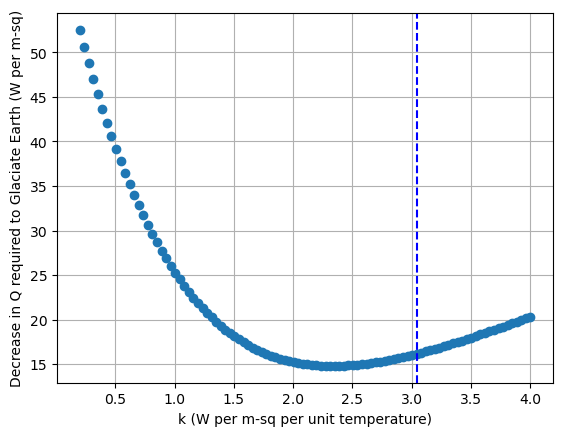

In [7]:
kSpace = np.linspace(0.2, 4, 100)
Q_decrease_arr = []
Q_increase_arr = []

for i in range(len(ASpace)):
    A = 202 #ASpace[i]
    B = 1.9 # outgoing radiation
    k = kSpace[i] #1.6*B # transport parameter
    s = lambda y: 1 - 0.482*(3*y**2 - 1)/2 # solar weighting
    aw = 0.32 # water albedo
    ai = 0.62 # ice albedo
    Tc = -10.0 # critical temperature for ice formation
    Q0 = 342.0 # solar constant (1370 W/m^2 divided by 4)

    Qmin = (Tc + A/B)*(B+k)/((1 - aw)*(s(1) + k/B))
    Qmax = (Tc + A/B)*(B+k)/((1 - ai)*(s(0) + k/B))
    #print("Min Q value for ice free", Qmin)
    #print("Max Q value for complete ice Earth", Qmax)

    # Note version in lectures was a 1/2 factor off on the second grouping of terms; 
    # now corrected to match Q6 of PS4
    abar = lambda ys: ai + (aw - ai)*ys*(1 - 0.241*(ys**2 - 1))
    Tbar = lambda ys, Q: (Q*(1 - abar(ys)) - A)/B 
    Tbari = lambda Q: (Q*(1 - ai)- A)/B
    Tbarw = lambda Q: (Q*(1 - aw)- A)/B
    Qfunc = lambda ys: (Tc + A/B)*(B+k)/(s(ys)*(1 - (ai+aw)/2) + k/B*(1 - abar(ys)))
    
    # Solve for the ice line
    ys = np.linspace(0, 1, 10000);
    Qs = Qfunc(ys);
    #plt.plot(Qs, ys, 'k', label="Ice/Water Mixture Steady States")
    #plt.plot([Q0, Q0], [0, 1], '--')
    #plt.plot([Qmin, 550], [1, 1], label="Ice-Free Steady States")
    #plt.plot([250, Qmax], [0, 0], label="Ice-Covered Steady States")
    #plt.xlabel('Q (in W per m-sq)');
    #plt.ylabel('$\it{y_s}$');
    plt.grid(1)


    # We can obtain the ice-line positions via Newton's. 
    # At the value of Q0 = 342, to obtain the ice line 
    # solve the equation 342 = Qfunc(ys) for the ys. 
    fwd = lambda ys: Q0 - Qfunc(ys)
    sol = root(fwd, 0.2)
    #print(sol.message)
    ys_low = sol.x[0]
    #print("lower ice line = ", ys_low)
    sol = root(fwd, 0.9)
    #print(sol.message)
    ys_high = sol.x[0]
    #print("higher ice line = ", ys_high)
    #plt.plot([Q0, Q0], [ys_low, ys_high], 'o')
    # plt.savefig('ys_vs_Q.png')
    #print(type(ys))
    #print(type(Qs))
    #print(ys)
    #print(Qs)

    ysn_1=0.1
    grad_arr = []
    grad1=-158

    for i in range(len(ys)):
        ysn=float(ys[i])
        grad=(Qfunc(ysn)-Qfunc(ysn_1))/(ysn-ysn_1)
        grad_arr.append(grad)
        if grad*grad1 < 0:
            #print("change of sign in gradient at ys = %s" % ysn)
            QTip = Qfunc(ysn)
            QDelta = 342-QTip
            Q_percentage = (100*QDelta)/342
            #print("Tipping Point at Q = %s" % QTip)
            
            if QDelta < 0:
                QDelta = 0
                #print("Decrease in Q required to glaciate earth = %s" % QDelta)
            #else:    
                #print("Decrease in Q required to glaciate earth = %s" % QDelta)
            
            #print("For A = %s" % A)
            #print("Percentage Q must be decreased by = %s" % Q_percentage)
            IncreaseReq = Qmax - QTip
            #print("Increase required before ice retreats from equator = %s" % IncreaseReq)
            #print("\n")
            #plt.plot(QTip, ysn, 'o', color = 'blue')
            TippingY = ysn
            Q_decrease_arr.append(QDelta)
            Q_increase_arr.append(IncreaseReq)
        ysn_1=ysn    
        grad1=grad

    #plt.plot(325.8, TippingY, 'o')
    #print("finished for loop")    
        
    ys_unstable = np.linspace(0, TippingY, 10000) #(1-TippingY)
    Qs_unstable = Qfunc(ys_unstable)
    #plt.plot(Qs_unstable, ys_unstable, 'k', label="Ice/Water Unstable Steady States", linestyle='dashed')
    ys_stable = np.linspace(TippingY, 1, 10000)
    Qs_stable = Qfunc(ys_stable);
    #plt.plot(Qs_stable, ys_stable, 'k', label="Ice/Water Stable Steady States")
    #plt.legend();
    
plt.plot(kSpace, Q_decrease_arr, 'o')  
plt.xlabel('k (W per m-sq per unit temperature)')
plt.ylabel('Decrease in Q required to Glaciate Earth (W per m-sq)')
plt.axvline(x=3.04, color='blue', linestyle='dashed')

Min Q value for ice free 387.3205040539219
Max Q value for complete ice Earth 348.90883491728266
The solution converged.
lower ice line =  -0.13768383555949817
The solution converged.
higher ice line =  0.6234743130939175
change of sign in gradient at ys = 0.24982498249824983
Tipping Point at Q = 327.9528844661176
Amount Q must be decreased = 14.04711553388239
Percentage Q must be decreased by = 4.107343723357424
increase required before ice retreats from equator = 20.95595045116505


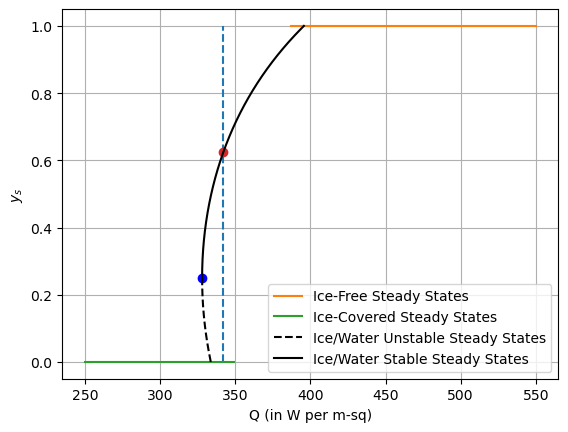

In [9]:
A = 202 # outgoing radiation
B = 1.9 # outgoing radiation
k = 1.6*B # transport parameter
s = lambda y: 1 - 0.482*(3*y**2 - 1)/2 # solar weighting
aw = 0.42 # water albedo
ai = 0.52 # ice albedo
Tc = -10.0 # critical temperature for ice formation
Q0 = 342.0 # solar constant (1370 W/m^2 divided by 4)

Qmin = (Tc + A/B)*(B+k)/((1 - aw)*(s(1) + k/B))
Qmax = (Tc + A/B)*(B+k)/((1 - ai)*(s(0) + k/B))
print("Min Q value for ice free", Qmin)
print("Max Q value for complete ice Earth", Qmax)

# Note version in lectures was a 1/2 factor off on the second grouping of terms; 
# now corrected to match Q6 of PS4
abar = lambda ys: ai + (aw - ai)*ys*(1 - 0.241*(ys**2 - 1))
Tbar = lambda ys, Q: (Q*(1 - abar(ys)) - A)/B 
Tbari = lambda Q: (Q*(1 - ai)- A)/B
Tbarw = lambda Q: (Q*(1 - aw)- A)/B

# Solve for the ice line
ys = np.linspace(0, 1, 10000);
Qs = Qfunc(ys);
#plt.plot(Qs, ys, 'k', label="Ice/Water Mixture Steady States")
plt.plot([Q0, Q0], [0, 1], '--')
plt.plot([Qmin, 550], [1, 1], label="Ice-Free Steady States")
plt.plot([250, Qmax], [0, 0], label="Ice-Covered Steady States")
plt.xlabel('Q (in W per m-sq)');
plt.ylabel('$\it{y_s}$');
plt.grid(1)


# We can obtain the ice-line positions via Newton's. 
# At the value of Q0 = 342, to obtain the ice line 
# solve the equation 342 = Qfunc(ys) for the ys. 
fwd = lambda ys: Q0 - Qfunc(ys)
sol = root(fwd, 0.2)
print(sol.message)
ys_low = sol.x[0]
print("lower ice line = ", ys_low)
sol = root(fwd, 0.9)
print(sol.message)
ys_high = sol.x[0]
print("higher ice line = ", ys_high)
plt.plot(Q0, ys_high, 'o')
# plt.savefig('ys_vs_Q.png')
#print(type(ys))
#print(type(Qs))
#print(ys)
#print(Qs)

ysn_1=0.1
grad_arr = []
grad1=-158

for i in range(len(ys)):
    ysn=float(ys[i])
    grad=(Qfunc(ysn)-Qfunc(ysn_1))/(ysn-ysn_1)
    grad_arr.append(grad)
    if grad*grad1 < 0:
        print("change of sign in gradient at ys = %s" % ysn)
        QTip = Qfunc(ysn)
        QDelta = 342-QTip
        Q_percentage = (100*QDelta)/342
        print("Tipping Point at Q = %s" % QTip)
        print("Amount Q must be decreased = %s" % QDelta)
        print("Percentage Q must be decreased by = %s" % Q_percentage)
        IncreaseReq = Qmax - QTip
        print("increase required before ice retreats from equator = %s" % IncreaseReq)
        plt.plot(QTip, ysn, 'o', color = 'blue')
        TippingY = ysn
    ysn_1=ysn    
    grad1=grad
    
ys_unstable = np.linspace(0, TippingY, 10000) #(1-TippingY)
Qs_unstable = Qfunc(ys_unstable)
plt.plot(Qs_unstable, ys_unstable, 'k', label="Ice/Water Unstable Steady States", linestyle='dashed')
ys_stable = np.linspace(TippingY, 1, 10000)
Qs_stable = Qfunc(ys_stable);
plt.plot(Qs_stable, ys_stable, 'k', label="Ice/Water Stable Steady States")
plt.legend();